# # Dynamic Programming (Pemrograman Dinamis)

Dynamic Programming (DP) adalah metode yang efisien untuk memecahkan kelas masalah yang kompleks dengan memecahnya menjadi sub-masalah yang lebih sederhana. Solusi dari sub-masalah ini kemudian disimpan (memoization atau tabulation) agar tidak perlu dihitung ulang. DP ideal digunakan untuk masalah yang memiliki dua properti utama:

- Optimal Substructure: Solusi optimal dari masalah keseluruhan dapat dibangun dari solusi optimal sub-masalahnya.

- Overlapping Subproblems: Sub-masalah yang sama muncul berulang kali.

Prinsip Dasar DP
- Memecah Masalah: Pisahkan masalah menjadi sub-masalah yang lebih kecil.

- Menyimpan Solusi: Simpan solusi dari sub-masalah dalam sebuah tabel (disebut tabulation atau bottom-up) atau menggunakan memoization (disebut top-down).

- Menggabungkan: Gunakan solusi yang telah disimpan untuk memecahkan sub-masalah yang lebih besar hingga masalah utama terpecahkan.

## Contoh Kasus Dynamic Programming: Barisan Fibonacci

Barisan Fibonacci adalah urutan bilangan di mana setiap bilangan adalah hasil penjumlahan dari dua bilangan sebelumnya (kecuali dua bilangan pertama).


$F(0) = 0$

$F(1) = 1$

$F(n) = F(n-1) + F(n-2)$ untuk $n > 1$

`Tugasnya adalah mencari bilangan Fibonacci ke-`$n$.

`Cara paling intuitif adalah menggunakan rekursi langsung sesuai definisi.`


## Solusi Dynamic Programming

DP mengatasi masalah perhitungan berulang ini dengan menyimpan hasilnya.

### 1. Top-Down DP (Memoization)

Kita tetap menggunakan rekursi, tetapi menambahkan sebuah cache (kamus/array) untuk menyimpan hasil yang sudah dihitung. Sebelum menghitung, kita cek cache dulu.

In [12]:
def fibonacci_top_down(n, memo={}):
    """
    Menghitung Fibonacci ke-n menggunakan DP Top-Down (Memoization).
    """
    # Base Case (Kasus Dasar)
    if n <= 1:
        return n
    
    # Cek Memoization (Apakah hasil sudah ada di cache?)
    if n in memo:
        return memo[n]
    
    # Hitung dan Simpan Hasil ke dalam Memo
    # F(n) = F(n-1) + F(n-2)
    result = fibonacci_top_down(n - 1, memo) + fibonacci_top_down(n - 2, memo)
    memo[n] = result
    print(memo)
    
    return result

In [13]:

n_case = 10
fib_result = fibonacci_top_down(n_case)
print('='*fib_result)
print(f"Bilangan Fibonacci ke-{n_case} adalah: {fib_result}")

{2: 1}
{2: 1, 3: 2}
{2: 1, 3: 2, 4: 3}
{2: 1, 3: 2, 4: 3, 5: 5}
{2: 1, 3: 2, 4: 3, 5: 5, 6: 8}
{2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13}
{2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13, 8: 21}
{2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13, 8: 21, 9: 34}
{2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13, 8: 21, 9: 34, 10: 55}
Bilangan Fibonacci ke-10 adalah: 55


### 2. Bottom-Up DP (Tabulation)

Kita mulai dari kasus dasar ($F(0)$ dan $F(1)$) dan secara iteratif membangun solusi untuk masalah yang lebih besar ($F(2)$, $F(3)$, dst.) hingga mencapai $F(n)$. Hasil disimpan dalam array/list.

In [21]:
def fibonacci_bottom_up(n):
    """
    Menghitung Fibonacci ke-n menggunakan DP Bottom-Up (Tabulation).
    """
    if n <= 1:
        return n
    
    # 1. Inisialisasi Tabel DP (array)
    # Array 'dp' akan menyimpan hasil F(0) hingga F(n)
    dp = [0] * (n + 1)
    
    # 2. Isi Kasus Dasar (Base Case)
    dp[0] = 0
    dp[1] = 1
    
    # 3. Iteratif Mengisi Tabel
    for i in range(2, n + 1):
        # Setiap nilai adalah jumlah dari dua nilai sebelumnya
        dp[i] = dp[i-1] + dp[i-2]
        
    print(dp)
    # Hasil akhir adalah elemen terakhir di tabel
    return dp[n]

In [22]:
# n_case = 10
fib_result = fibonacci_bottom_up(n_case)

print(f"Bilangan Fibonacci ke-{n_case} adalah: {fib_result}")

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]
Bilangan Fibonacci ke-10 adalah: 55


### Stage Coach Case

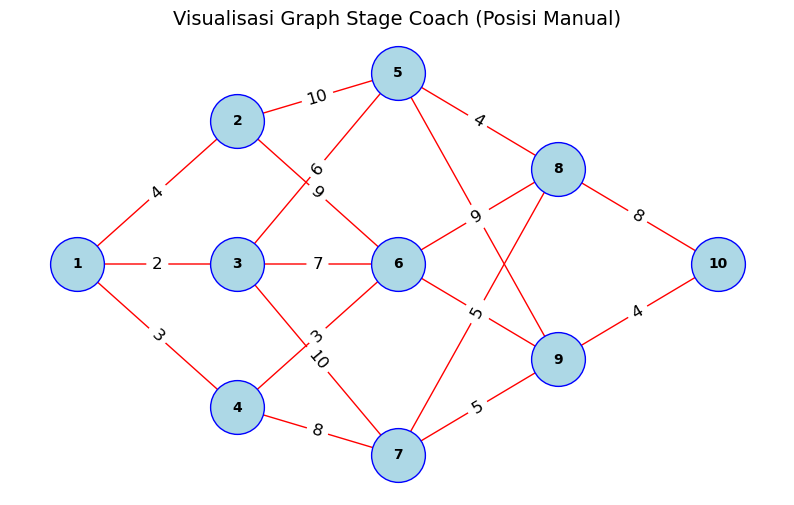

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Definisi Data Graph
graph = {
    '1': {'2': 4, '3': 2, '4': 3},
    '2': {'5': 10, '6': 9},
    '3': {'5': 6, '6': 7, '7': 10},
    '4': {'6': 3, '7': 8},
    '5': {'8': 4, '9': 8},
    '6': {'8': 9, '9': 6},
    '7': {'8': 5, '9': 5},
    '8': {'10': 8}, 
    '9': {'10': 4},
    '10': {}
}

# Buat directed graph menggunakan networkx
G = nx.DiGraph()
for u, edges in graph.items():
    for v, w in edges.items():
        # Pastikan bobot (weight) adalah integer/float, bukan string yang mengandung 'jt'
        G.add_edge(u, v, weight=w)

# 2. **Koreksi Utama: Menentukan Posisi Node Secara Manual (Stage Layout)**
# Kita membagi node menjadi 5 tahap (stage) dan menetapkan koordinat (x, y)
# x adalah nomor tahap, y adalah posisi vertikal
pos = {}

# Tahap 1 (x=1)
pos['1'] = (1, 2.5) # Posisi tengah

# Tahap 2 (x=2)
pos['2'] = (2, 4)
pos['3'] = (2, 2.5)
pos['4'] = (2, 1)

# Tahap 3 (x=3)
pos['5'] = (3, 4.5)
pos['6'] = (3, 2.5)
pos['7'] = (3, 0.5)

# Tahap 4 (x=4)
pos['8'] = (4, 3.5)
pos['9'] = (4, 1.5)

# Tahap 5 (x=5)
pos['10'] = (5, 2.5)

# 3. Visualisasi Graph
plt.figure(figsize=(10, 6)) # Ukuran figure lebih lebar untuk graph bertahap

# Gambar Node dan Sisi
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightblue', edgecolors='blue')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
nx.draw_networkx_edges(G, pos, arrowsize=15, edge_color='red')

# Gambar Edge Labels (Biaya)
edge_labels = {(u, v): w for u, v, w in G.edges(data='weight')}
# Atur posisi label sedikit di atas sisi (gunakan 'connectionstyle' untuk offset)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=12,
                                # offset label agar tidak menimpa sisi (opsional, tergantung preferensi)
                                # bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')
                            )

plt.title("Visualisasi Graph Stage Coach (Posisi Manual)", fontsize=14)
plt.axis('off')
plt.show()

In [66]:
def shortest_path_naive(current_node, end_node):
    """
    Menghitung biaya minimum dan rute terpendek secara rekursif naif.
    Mengembalikan tuple: (biaya_minimum, list_rute_terpendek)
    """
    # 1. Kasus Dasar (Base Case): Mencapai node akhir
    if current_node == end_node:
        # Biaya 0 dari node itu sendiri ke node itu sendiri, rutenya adalah node itu
        return (0, [current_node]) 
    
    # 2. Jika node tidak ada di graph atau tidak memiliki tetangga (jalan buntu)
    if current_node not in graph or not graph[current_node]:
        return (float('inf'), [])
    
    min_total_cost = float('inf')
    shortest_path = []
    
    # 3. Rekursi: Coba setiap tetangga (jalan)
    for neighbor, cost in graph[current_node].items():
        # print(f'Node: {neighbor}')
        
        # Panggil rekursi: Dapatkan biaya minimum dan rute dari 'neighbor' ke 'end_node'
        cost_from_neighbor, path_from_neighbor = shortest_path_naive(neighbor, end_node)
        
        # Hitung Biaya Total dari current_node melalui neighbor
        total_cost = cost + cost_from_neighbor
        
        # Bandingkan dan simpan biaya minimum beserta rute barunya
        if total_cost < min_total_cost:
            min_total_cost = total_cost
            # Rute terpendek adalah current_node diikuti oleh rute terpendek dari neighbor
            shortest_path = [current_node] + path_from_neighbor
            print(path_from_neighbor)
            
    # Kembalikan biaya minimum dan rute terpendek yang ditemukan
    return (min_total_cost, shortest_path)

# --- Eksekusi Program ---
start_node = '1'
end_node = '10'

# Jalankan Brute Force dari kota 1 ke 10
min_cost_naive, shortest_route_list = shortest_path_naive(start_node, end_node)

print("--- Hasil Tanpa Dynamic Programming (Rekursif Naif) ---")
# Cek apakah rute ditemukan (biaya bukan 'inf')
if min_cost_naive != float('inf'):
    print(f"Total Biaya Minimum dari {start_node} ke {end_node}: {min_cost_naive}")
    print(f"Rute Terpendek: {' -> '.join(shortest_route_list)}")
else:
    print(f"Tidak ada jalur yang ditemukan dari {start_node} ke {end_node}.")

['10']
['8', '10']
['10']
['5', '8', '10']
['10']
['8', '10']
['10']
['9', '10']
['6', '9', '10']
['2', '6', '9', '10']
['10']
['8', '10']
['10']
['5', '8', '10']
['10']
['8', '10']
['10']
['9', '10']
['6', '9', '10']
['10']
['8', '10']
['10']
['9', '10']
['3', '6', '9', '10']
['10']
['8', '10']
['10']
['9', '10']
['6', '9', '10']
['10']
['8', '10']
['10']
['9', '10']
['4', '6', '9', '10']
--- Hasil Tanpa Dynamic Programming (Rekursif Naif) ---
Total Biaya Minimum dari 1 ke 10: 16
Rute Terpendek: 1 -> 4 -> 6 -> 9 -> 10


In [60]:
def shortest_path_dp_with_trace(graph, end_node):
    """
    Menghitung biaya minimum menggunakan DP Bottom-Up dan menyimpan rute optimal.
    """
    
    # Tentukan urutan tahap dari belakang ke depan
    stages = [
        ['10'], 
        ['8', '9'], 
        ['5', '6', '7'], 
        ['2', '3', '4'], 
        ['1'] 
    ]

    # 1. Inisialisasi Tabel DP (dictionary) untuk Biaya Minimum
    min_costs = {end_node: 0}
    
    # 2. Inisialisasi Dictionary untuk menyimpan Rute Optimal (next_node)
    # path_choices[node] = node_selanjutnya_optimal
    path_choices = {}
    
    # 3. Iterasi mundur melalui Tahap (kecuali tahap akhir)
    for stage_index in range(1, len(stages)):
        current_stage_nodes = stages[stage_index]
        
        for node in current_stage_nodes:
            min_cost_from_node = float('inf')
            best_next_node = None # Variabel untuk menyimpan node selanjutnya yang optimal
            
            # Cari tetangga node saat ini (node di tahap berikutnya)
            for neighbor, cost in graph[node].items():
                
                # Biaya ke end_node = Biaya Sisi (node->neighbor) + Biaya Minimum dari neighbor ke end_node
                cost_to_end = cost + min_costs.get(neighbor, float('inf'))
                
                # Bandingkan dan perbarui biaya minimum
                if cost_to_end < min_cost_from_node:
                    min_cost_from_node = cost_to_end
                    best_next_node = neighbor # Simpan keputusan optimal
            
            # Simpan hasil perhitungan minimum dan keputusan optimal untuk node ini
            min_costs[node] = min_cost_from_node
            if best_next_node is not None:
                path_choices[node] = best_next_node

    return min_costs, path_choices

def trace_path(start_node, end_node, path_choices):
    """
    Melacak jalur terpendek dari start_node ke end_node menggunakan path_choices.
    """
    current_node = start_node
    path = [current_node]
    
    while current_node != end_node and current_node in path_choices:
        next_node = path_choices[current_node]
        path.append(next_node)
        current_node = next_node
        
        # print(path)
    return path

# --- Eksekusi Program ---

start_node = '1'
end_node = '10'

# 1. Hitung Biaya Minimum dan Pilihan Rute Optimal
min_costs_dp, path_choices_dp = shortest_path_dp_with_trace(graph, end_node)

# 2. Lacak Jalur Terpendek
shortest_route = trace_path(start_node, end_node, path_choices_dp)
total_cost = min_costs_dp[start_node]

# 3. Tampilkan Hasil
print("--- Hasil Dynamic Programming Stage Coach ---")
print(f"Pilihan Rute Optimal (Node Berikutnya): {path_choices_dp}")
print("-" * 40)
print(f"Total Biaya Minimum dari {start_node} ke {end_node}: {total_cost}")
print(f"Rute Terpendek: {' -> '.join(shortest_route)}")

--- Hasil Dynamic Programming Stage Coach ---
Pilihan Rute Optimal (Node Berikutnya): {'8': '10', '9': '10', '5': '8', '6': '9', '7': '9', '2': '6', '3': '6', '4': '6', '1': '4'}
----------------------------------------
Total Biaya Minimum dari 1 ke 10: 16
Rute Terpendek: 1 -> 4 -> 6 -> 9 -> 10
